> 

# Project: Investigate TMDb movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.

> ● Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.

> ● There are some odd characters
in the ‘cast’ column. Don’t worry
about cleaning them. You can
leave them as is.

> ● The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time.

These are the qestions we will answer through the data analysis:

> ● Which genres are most popular from year to year?

> ● What kinds of properties are associated with movies that have high revenues?

> ● How the vote average have changed over the years? Were the oldest movies better than the newst?


In [3]:
# First, let's import the needed statements for all of the packages we are going to use:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we load our data, check for cleanliness, and then trim and clean the  dataset for analysis.

### General Properties

In [4]:
# Let's read the file and inspect data looking for instances of missing or possibly errant data.
df = pd.read_csv(
    'C:/Users/BERMQ/Udacity_Exercices/Data Analyst/Data Analysis Process - Case Study 2/Project - Investigate a Dataset/tmdb-movies.csv')

df = pd.DataFrame(df)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# We can see here that there are missing entries in columns cast, homepage, director,tagline, keywords and overview.
# 'id', 'imdb_id', 'homepage', 'overview', 'tagline', 'keywords', 'production_companies' are innecessary fields for our purpose and they can be dropped from the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# Here we can see some statistical information regarding our dataset

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning (Replace this with more specific notes!)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   cast            10790 non-null  object 
 5   director        10822 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  float64
 13  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


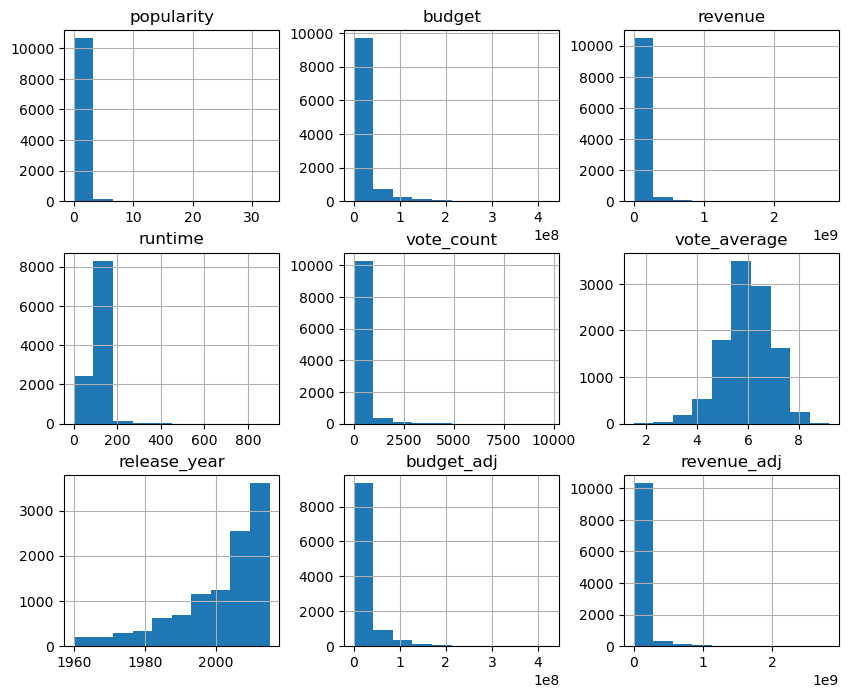

In [7]:
# Let's remove the unnecessary columns first, since they are not needed for our analysis and have a look at how the resulting dataset looks like.


df.drop([ 'id', 'imdb_id', 'homepage', 'overview', 'tagline', 'keywords', 'production_companies'], axis = 1, inplace = True)
df.head()

df.info()
df.hist(figsize=(10,8));


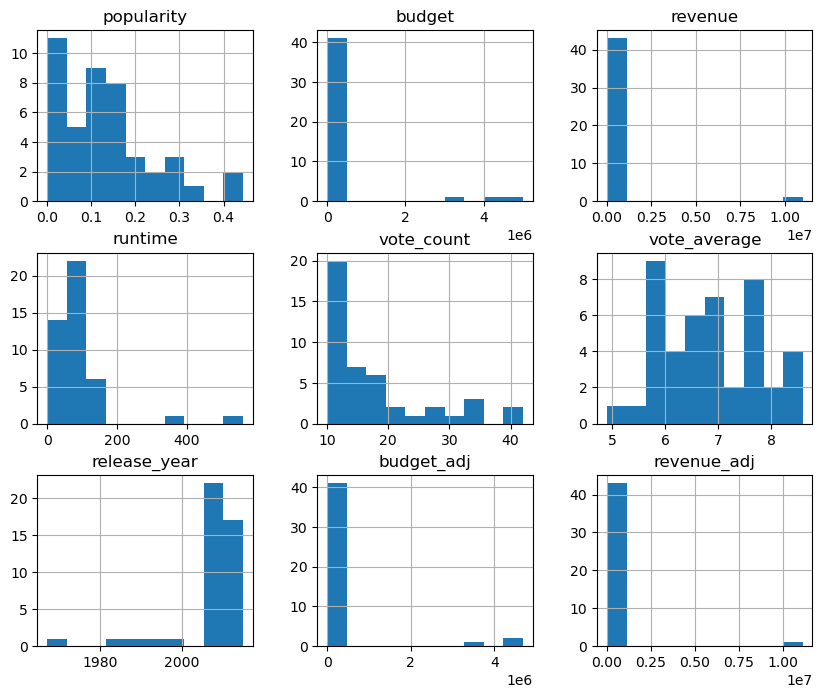

In [8]:
# We have seen that there are columns with missing entries: director, cast and genres. 
# Let's find out how the 'director' null entries look like


df[df.director.isnull()].hist(figsize=(10,8));

In [9]:
# We can see that those entries, in the most of the cases also have no revenue and budget values:

df[df.director.isnull()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,71,Comedy,1/23/15,14,6.6,2015,0.000000e+00,0.000000e+00
548,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,25,Documentary|Science Fiction,8/10/15,12,7.5,2015,0.000000e+00,0.000000e+00
556,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,105,Comedy|Romance,1/24/15,14,6.5,2015,0.000000e+00,0.000000e+00
1032,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,43,TV Movie|Documentary,3/18/14,32,6.3,2014,0.000000e+00,0.000000e+00
1054,0.269468,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,60,TV Movie|Documentary,1/19/14,11,7.2,2014,0.000000e+00,0.000000e+00
1203,0.119891,150000,0,Free to Play,Benedict Lim|Danil Ishutin|Clinton Loomis,NaN,75,Documentary,3/19/14,40,7.0,2014,1.381637e+05,0.000000e+00
1241,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,0,Romance|Music|Comedy,1/1/14,18,5.7,2014,0.000000e+00,0.000000e+00
1288,0.038364,0,0,Top Gear: The Perfect Road Trip 2,Jeremy Clarkson|Richard Hammond,NaN,94,Documentary,11/17/14,12,6.8,2014,0.000000e+00,0.000000e+00
1852,0.256703,0,0,The Diary of Anne Frank,Ellie Kendrick|Kate Ashfield|Geoff Breton|Feli...,NaN,100,Drama,1/9/09,19,7.5,2009,0.000000e+00,0.000000e+00
1872,0.091395,3250000,0,Paa,Amitabh Bachchan|Abhishek Bachchan|Vidya Balan...,NaN,133,Drama|Family|Foreign,12/4/09,11,6.1,2009,3.303301e+06,0.000000e+00


In [10]:
# So that we can proceed to drop the null 'director' entries:

df.director.isnull().dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   cast            10790 non-null  object 
 5   director        10822 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  float64
 13  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [11]:
# Now have a look at the genres null values:

df[df.genres.isnull()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,10/6/15,13,5.0,2015,0.00000,0.0
997,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,44,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,88,NaN,2/27/09,57,7.4,2009,0.00000,0.0
1897,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,76,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Michael Scott,0,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,62,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,YÄ±lmaz ErdoÄŸan,110,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,Kim Jin-Yeong,96,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,Danny Boyle,220,NaN,7/27/12,12,8.3,2012,0.00000,0.0


In [12]:
# Now have a look at the cast null values:

df[df.cast.isnull()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,11/25/15,47,6.9,2015,0.000000,0.0
441,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,10/9/15,37,8.2,2015,0.000000,0.0
465,0.201696,0,0,Bitter Lake,NaN,Adam Curtis,135,Documentary,1/24/15,19,7.8,2015,0.000000,0.0
536,0.122543,0,0,A Faster Horse,NaN,David Gelb,90,Documentary,10/8/15,12,8.0,2015,0.000000,0.0
538,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,1/1/15,11,8.9,2015,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,0.253376,0,0,Red's Dream,NaN,John Lasseter,4,Animation,8/17/87,44,6.6,1987,0.000000,0.0
9755,0.046272,0,0,The Big Shave,NaN,Martin Scorsese,6,Drama,1/1/68,12,6.7,1968,0.000000,0.0
10434,0.146906,200,0,Six Men Getting Sick,NaN,David Lynch,4,Animation,1/1/67,16,5.2,1967,1307.352748,0.0
10550,0.306425,0,0,Luxo Jr.,NaN,John Lasseter,2,Animation|Family,8/17/86,81,7.3,1986,0.000000,0.0


In [13]:
# The same as the director ones, the 'cast' and 'genrers' nell values also have missing budget and revenue values so that we can proceed to drop them too:

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10732 non-null  float64
 1   budget          10732 non-null  int64  
 2   revenue         10732 non-null  int64  
 3   original_title  10732 non-null  object 
 4   cast            10732 non-null  object 
 5   director        10732 non-null  object 
 6   runtime         10732 non-null  int64  
 7   genres          10732 non-null  object 
 8   release_date    10732 non-null  object 
 9   vote_count      10732 non-null  int64  
 10  vote_average    10732 non-null  float64
 11  release_year    10732 non-null  int64  
 12  budget_adj      10732 non-null  float64
 13  revenue_adj     10732 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [14]:
# Finally let's convert to datetime the 'release_date' the way that we can make usage of it:
df["release_date"] = pd.to_datetime(df["release_date"])
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Which genres are most popular from year to year?

In [15]:
# Let's group all the values by 'release_year' and 'genres' and see find out the mean value for each genre across the years

pop_df = df.groupby(['release_year', 'genres'], as_index=False)['popularity'].mean()

pop_df


,release_year,genres,popularity
0,1960,Action|Adventure|Drama|History|Western,0.310398
1,1960,Action|Adventure|Western,1.872132
2,1960,Action|Drama|Foreign|History|War,0.194948
3,1960,Action|Drama|History,1.136943
4,1960,Action|Drama|History|War,0.256779
...,...,...,...
6044,2015,War|Action,0.356519
6045,2015,War|Adventure|Science Fiction,5.476958
6046,2015,War|Drama,0.561032
6047,2015,Western|Drama,0.747541


In [16]:
# Then just show which is the 'genre' which had the better popularity each year:

pop_df = pop_df.groupby(['release_year'], as_index=False)['popularity', 'genres'].max()
pop_df

C:\Users\BERMQ\AppData\Local\Temp\ipykernel_32584\2043566023.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pop_df = pop_df.groupby(['release_year'], as_index=False)['popularity', 'genres'].max()


,release_year,popularity,genres
0,1960,2.610362,Thriller|Music|Comedy|Crime
1,1961,2.631987,Western|Action|Adventure
2,1962,3.170651,Western|Action|Adventure|Drama
3,1963,2.508235,Romance|Comedy|Drama
4,1964,3.153791,Western|Action
5,1965,1.910465,War|Drama|Romance
6,1966,1.227582,Western
7,1967,2.550704,Western
8,1968,3.309196,Western
9,1969,1.778746,Thriller|Fantasy|Action|Science Fiction|Western


### What kinds of properties are associated with movies that have high revenues?

In [17]:
# Let's define the revenue adjusted mean first

revenue_mean = np.mean(df.revenue_adj)
print(revenue_mean)



52001473.63828793


In [18]:
# Then filter away the values lower than the revenue mean 

df_high_revenue = df.loc[df['revenue_adj'] >= revenue_mean]

df_high_revenue 

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10819,0.044675,0,78000000,Hooper,Burt Reynolds|Robert Klein|Adam West|Jan-Micha...,Hal Needham,107,Action|Comedy,1978-07-28,13,6.0,1978,0.000000e+00,2.607307e+08
10822,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,131,Drama,2066-06-21,74,7.5,1966,5.038511e+07,2.266436e+08
10828,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,128,Mystery|Thriller,2066-07-13,46,6.3,1966,2.015404e+07,8.733419e+07
10835,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Action|Adventure|Drama|War|Romance,2066-12-20,28,7.0,1966,8.061618e+07,1.343603e+08


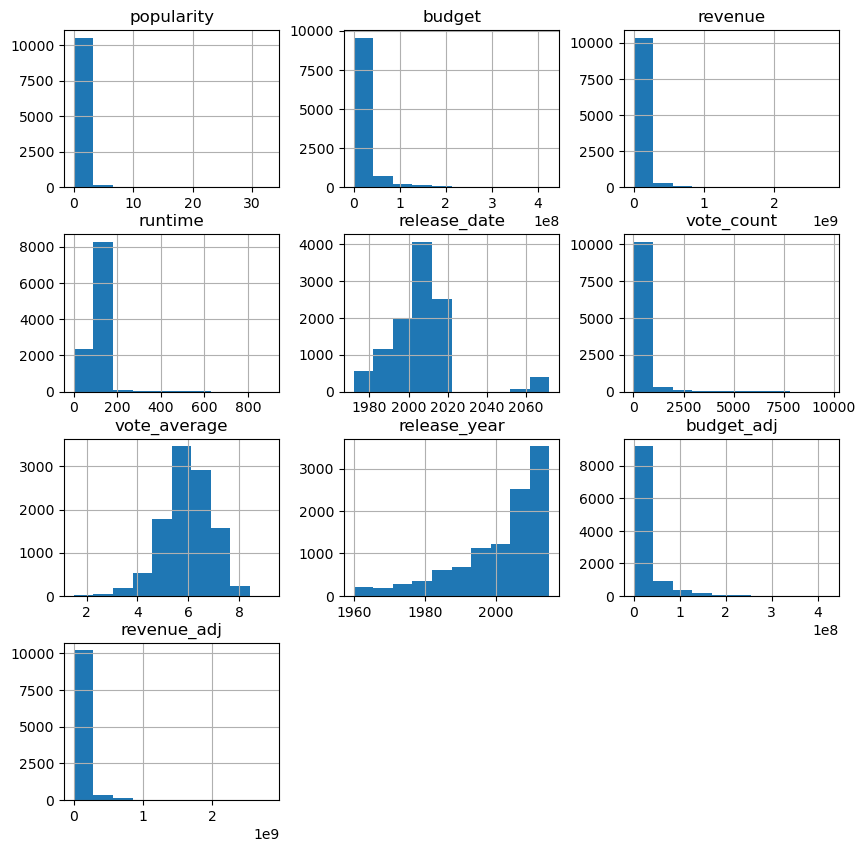

In [19]:
# Let's look how the filtered dataset looks like:

df.hist(figsize= (10,10));

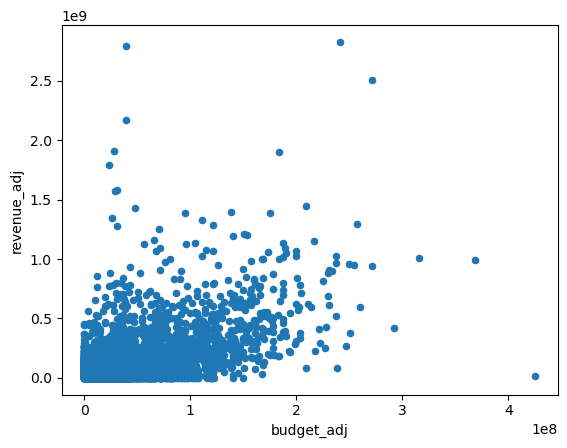

In [20]:
# Let's plot first the 'budget_adj' in relation to the revenue_adj'. We can see that there is a positive strong relationship between these values:

df.plot(x= 'budget_adj', y = 'revenue_adj', kind = 'scatter');

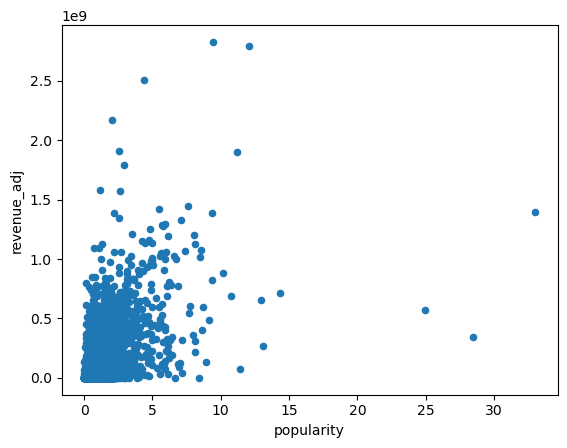

In [21]:
# The same as the budget, also the popularity is strongly linked with the revenue of a movie:

df.plot(x= 'popularity', y = 'revenue_adj', kind = 'scatter');

In [22]:
# Let's find out who are the top 10 blockbusters directors. 
# Let's group all the values by 'director' and find out the sum of all revenues associated to the movies directed by each director

director_df = df.groupby(['director'], as_index=False)['revenue_adj'].sum()

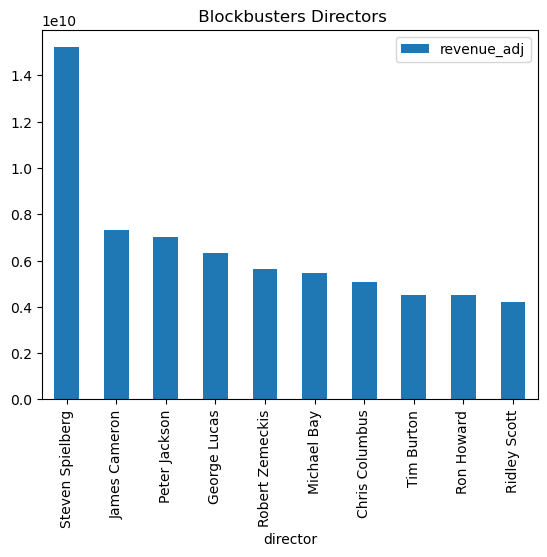

In [23]:
# We can see that the top director by revenue is Steven Spielberg by far:

director_df = director_df.sort_values(by='revenue_adj', ascending=False )
director_df.head(10).plot(x= 'director', y = 'revenue_adj', kind = 'bar', title = ' Blockbusters Directors');

In [43]:
# Here we can see how the revenue has been incresing constantly over the years.
# Let's define a function ('plot_data') we can reuse to plot the data similarly later on

def plot_data(x, y):
    sns.set_style('dark')
    df.plot(x, y, kind = 'bar', figsize= (10,10))
    plt.xlabel(x, fontsize=18)
    plt.ylabel(y, fontsize=18)    
    return(plt.show())
    
sum = df.groupby(['release_year'], as_index=False)['revenue_adj'].sum()
sum = plot_data('release_year', 'revenue_adj')


KeyboardInterrupt: 

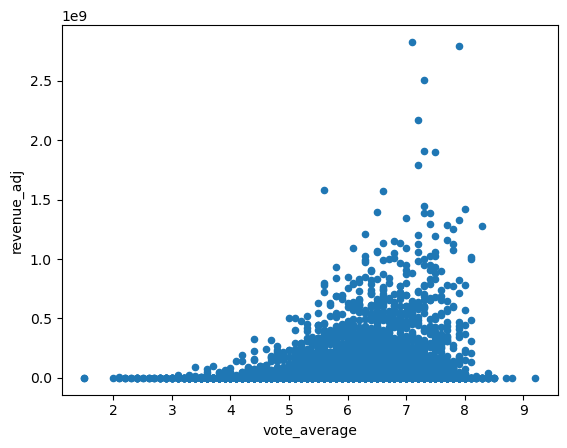

In [ ]:
# And here we can see how the better movies have often the highest revenues:
df.plot(x= 'vote_average', y = 'revenue_adj', kind = 'scatter');

### How the vote average have changed over the years? Were the oldest movies better than the newst?

5.964619828550148


Text(0, 0.5, 'vote average')

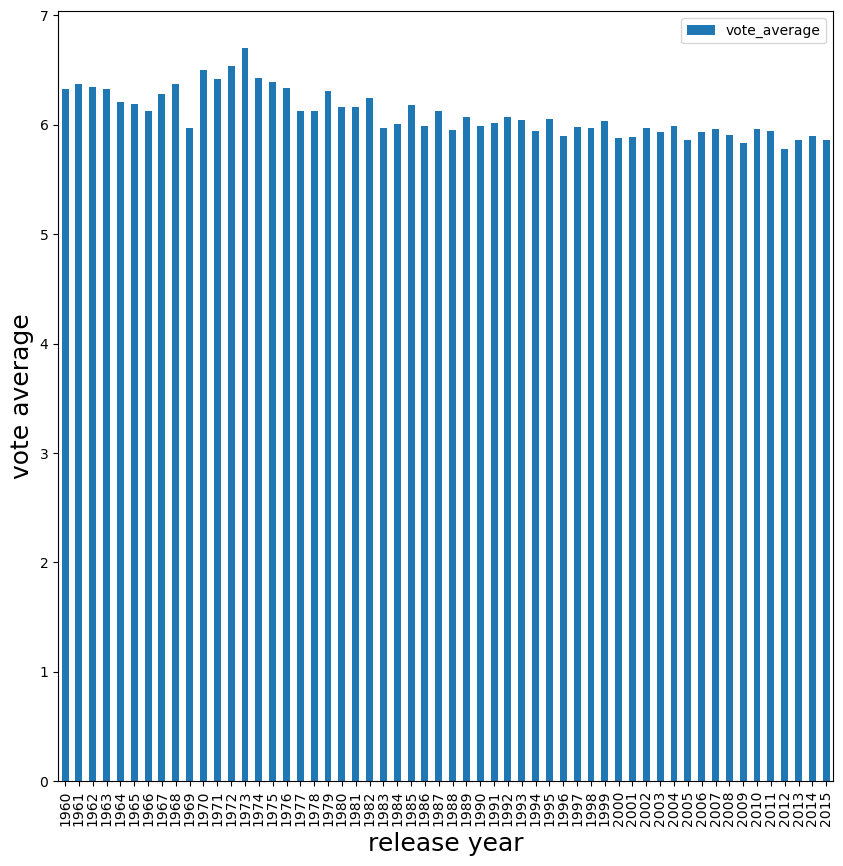

In [ ]:
# As we can see in the chart below the vote average (5.96) has been more or less stable across the years. 
# But looking carefully we can notice that there has been a negative trend starting from valuations a little below the average in the 60s and 70s, moving to valuations in the average over the 80s and a little below the average starting from the 90s.

glob_vote_average_mean = df.vote_average.mean()
print(glob_vote_average_mean)
pop_df = df.groupby(['release_year'], as_index=False)['vote_average'].mean().plot(x= 'release_year', y = 'vote_average', kind = 'bar', figsize= (10,10));
plt.xlabel('release year', fontsize=18)
plt.ylabel('vote average', fontsize=18)



<a id='conclusions'></a>
## Conclusions

> We have discovered that the most popular movie genres over the years have been the Wester, absolute winner in the 60s and 70s until the first 80s. The rest of the 80s have been dominated by the new Horror genre and the War/Darama.
In the 90 we saw Western movies revival that will alternates the best scorees with the war movies up to 2015. 

> We have seen how budget, popularity, vote average and directors are connected to the revenue of a movie. And we caould also see how the revenues of the movies has been increasing exponentially over the years.
Another interesting aspect has been to see the the chart of the more popular directors and their total revenues.

> Finally we have found out that the best voted movies are the oldest ones.